In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("loss_mean_and_std.csv", index_col=0)

Text(0.5, 1.0, 'Loss mean+-std, 10 training')

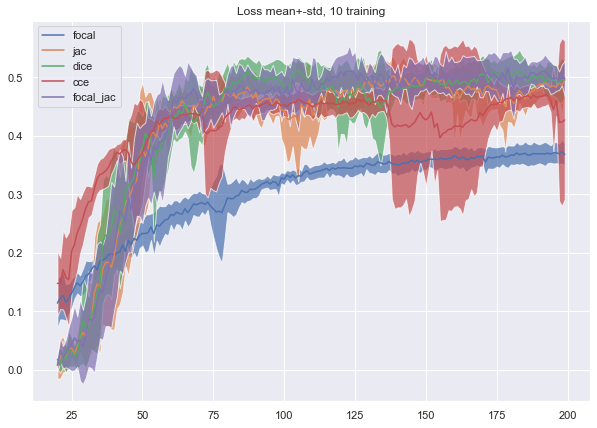

In [40]:
sns.set_theme()

stds = df[["focal_std", "jac_std", "dice_std", "cce_std", "focal_jac_std"]]
lines = df[["focal", "jac", "dice", "cce", "focal_jac"]]

fig = plt.subplots(figsize=(10,7))
for std, line in zip(stds, lines):
    l,s = lines[line].iloc[20:], stds[std].iloc[20:]
    plt.plot(l, label=line)
    plt.fill_between(l.index, l+s, l-s, alpha=0.7)
plt.legend()
plt.title("Loss mean+-std, 10 training")

In [41]:
df = pd.read_csv("model_mean_and_std.csv", index_col=0)
df

,unet,unet_std,resnet18,resnet18_std,resnet34,resnet34_std,resnet50,resnet50_std,resnet101,resnet101_std,resnet152,resnet152_std
0,0.027320,0.049018,0.005137,0.008651,0.001487,0.016183,-0.003910,0.015097,-0.002392,0.010271,4.199671e-03,9.301005e-03
1,0.022001,0.048871,-0.000030,0.006240,0.004460,0.011686,-0.003043,0.003802,0.003151,0.007759,1.392423e-03,5.746278e-03
2,0.020135,0.050889,0.004920,0.015087,0.007332,0.015119,-0.000645,0.005430,0.005746,0.011095,4.644389e-03,8.727774e-03
3,0.019371,0.047367,0.011404,0.020587,0.003702,0.009103,-0.005021,0.026724,0.007409,0.016968,6.384225e-03,1.033418e-02
4,0.011329,0.026489,0.000731,0.013452,0.004185,0.016944,-0.004858,0.017998,0.012319,0.015448,8.192000e+09,2.457600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.383408,0.018530,0.522644,0.021377,0.539374,0.030809,0.515150,0.038194,0.526070,0.024056,4.997541e-01,9.304193e-02
196,0.387522,0.017609,0.521025,0.025027,0.535241,0.022990,0.524328,0.031006,0.532618,0.020611,5.013939e-01,8.975297e-02
197,0.386499,0.026692,0.520799,0.028619,0.530409,0.030183,0.532804,0.028486,0.535758,0.025525,4.900320e-01,1.108427e-01
198,0.398171,0.028948,0.523124,0.028738,0.543142,0.022210,0.516657,0.044268,0.531034,0.025290,4.776261e-01,1.322832e-01


In [42]:
df.columns

Index(['unet', 'unet_std', 'resnet18', 'resnet18_std', 'resnet34',
       'resnet34_std', 'resnet50', 'resnet50_std', 'resnet101',
       'resnet101_std', 'resnet152', 'resnet152_std'],
      dtype='object')

Text(0, 0.5, 'val mcc score')

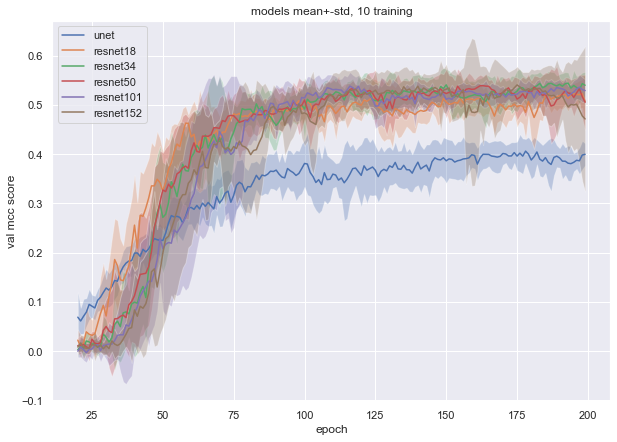

In [48]:
lines = df[['unet',  'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']]
stds = df[['unet_std', 'resnet18_std', 'resnet34_std', 'resnet50_std','resnet101_std', 'resnet152_std']]

fig = plt.subplots(figsize=(10,7))
for std, line in zip(stds, lines):
    l,s = lines[line].iloc[20:], stds[std].iloc[20:]
    plt.plot(l, label=line)
    plt.fill_between(l.index, l+s, l-s, alpha=0.3)
plt.legend()
plt.title("models mean+-std, 10 training"); plt.xlabel("epoch"); plt.ylabel("val mcc score")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

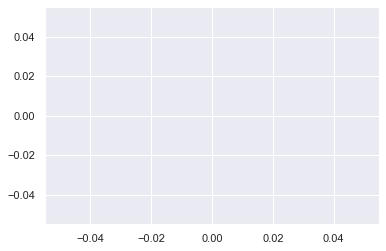

In [53]:
sns.lineplot(data=lines.iloc[25:], ci=stds)

In [54]:
df = pd.read_csv("final_massive_test.csv", index_col=0)
df

,Focal loss\nUnet\nAdam_val_mcc_0,Focal loss\nUnet\nAdam_val_mcc_1,Focal loss\nUnet\nAdam_val_mcc_2,Focal loss\nUnet\nAdam_val_mcc_3,Focal loss\nUnet\nAdam_val_mcc_4,Focal loss\nUnet\nAdam_val_mcc_5,Focal loss\nUnet\nAdam_val_mcc_6,Focal loss\nUnet\nAdam_val_mcc_7,Focal loss\nUnet\nAdam_val_mcc_8,Focal loss\nUnet\nAdam_val_mcc_9,...,Focal loss\nResNet34\nAdam_val_mcc_0,Focal loss\nResNet34\nAdam_val_mcc_1,Focal loss\nResNet34\nAdam_val_mcc_2,Focal loss\nResNet34\nAdam_val_mcc_3,Focal loss\nResNet34\nAdam_val_mcc_4,Focal loss\nResNet34\nAdam_val_mcc_5,Focal loss\nResNet34\nAdam_val_mcc_6,Focal loss\nResNet34\nAdam_val_mcc_7,Focal loss\nResNet34\nAdam_val_mcc_8,Focal loss\nResNet34\nAdam_val_mcc_9
0,0.002467,0.012735,0.005227,0.000108,0.002604,-0.001305,-0.000057,0.002198,0.002234,-0.000384,...,0.001161,0.000990,0.004880,0.006325,0.008435,-0.008400,-0.011859,0.001694,0.000345,0.000333
1,0.001328,0.009900,0.000346,0.005800,0.006565,-0.000689,-0.001039,0.001584,0.004072,0.001254,...,0.001737,0.017682,-0.003078,0.005688,-0.001559,-0.002875,-0.000455,0.001617,-0.001335,-0.003018
2,-0.000254,0.001800,-0.000835,0.004437,0.001780,0.000115,0.003797,0.000893,0.010551,0.000826,...,0.010318,0.011431,-0.008661,0.015016,-0.001987,-0.005036,0.015298,0.002381,-0.000192,-0.015676
3,0.001243,0.001438,0.002949,0.001946,0.002144,-0.000941,0.007482,0.000763,0.022791,0.000792,...,0.003133,-0.009924,-0.018244,-0.010223,-0.001772,-0.009376,0.018385,0.003198,-0.000488,0.003604
4,-0.000819,0.000995,0.001716,0.000084,0.001961,-0.001673,0.001511,0.001711,0.039565,0.000519,...,0.000812,-0.006834,-0.014783,-0.011761,-0.004102,-0.008952,-0.014639,0.007373,-0.000832,0.002387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.363982,0.314698,0.340076,0.330857,0.349563,0.332190,0.362431,0.322568,0.313922,0.307818,...,0.325837,0.328695,0.353148,0.394785,0.202943,0.318846,0.379825,0.426495,0.398663,0.360899
246,0.366328,0.319679,0.340137,0.335967,0.344339,0.324988,0.361064,0.318958,0.315883,0.304888,...,0.326524,0.335081,0.353639,0.400803,0.204377,0.331383,0.377227,0.425996,0.403596,0.356323
247,0.370051,0.321656,0.340763,0.331421,0.331939,0.303860,0.356781,0.322898,0.317869,0.301724,...,0.328016,0.331571,0.354685,0.398168,0.210030,0.340291,0.387406,0.430461,0.400777,0.357462
248,0.367661,0.321552,0.341316,0.331731,0.333225,0.293918,0.357302,0.334196,0.317135,0.300308,...,0.329711,0.331855,0.357831,0.402002,0.206761,0.340576,0.387213,0.429379,0.397542,0.355750


In [55]:
a = df[[i for i in df.columns[:]]]
#a.columns = [col[:-2] for col in a.columns]
a["epochs"] = a.index+1
#a["model"] = 0
a

,Focal loss\nUnet\nAdam_val_mcc_0,Focal loss\nUnet\nAdam_val_mcc_1,Focal loss\nUnet\nAdam_val_mcc_2,Focal loss\nUnet\nAdam_val_mcc_3,Focal loss\nUnet\nAdam_val_mcc_4,Focal loss\nUnet\nAdam_val_mcc_5,Focal loss\nUnet\nAdam_val_mcc_6,Focal loss\nUnet\nAdam_val_mcc_7,Focal loss\nUnet\nAdam_val_mcc_8,Focal loss\nUnet\nAdam_val_mcc_9,...,Focal loss\nResNet34\nAdam_val_mcc_1,Focal loss\nResNet34\nAdam_val_mcc_2,Focal loss\nResNet34\nAdam_val_mcc_3,Focal loss\nResNet34\nAdam_val_mcc_4,Focal loss\nResNet34\nAdam_val_mcc_5,Focal loss\nResNet34\nAdam_val_mcc_6,Focal loss\nResNet34\nAdam_val_mcc_7,Focal loss\nResNet34\nAdam_val_mcc_8,Focal loss\nResNet34\nAdam_val_mcc_9,epochs
0,0.002467,0.012735,0.005227,0.000108,0.002604,-0.001305,-0.000057,0.002198,0.002234,-0.000384,...,0.000990,0.004880,0.006325,0.008435,-0.008400,-0.011859,0.001694,0.000345,0.000333,1
1,0.001328,0.009900,0.000346,0.005800,0.006565,-0.000689,-0.001039,0.001584,0.004072,0.001254,...,0.017682,-0.003078,0.005688,-0.001559,-0.002875,-0.000455,0.001617,-0.001335,-0.003018,2
2,-0.000254,0.001800,-0.000835,0.004437,0.001780,0.000115,0.003797,0.000893,0.010551,0.000826,...,0.011431,-0.008661,0.015016,-0.001987,-0.005036,0.015298,0.002381,-0.000192,-0.015676,3
3,0.001243,0.001438,0.002949,0.001946,0.002144,-0.000941,0.007482,0.000763,0.022791,0.000792,...,-0.009924,-0.018244,-0.010223,-0.001772,-0.009376,0.018385,0.003198,-0.000488,0.003604,4
4,-0.000819,0.000995,0.001716,0.000084,0.001961,-0.001673,0.001511,0.001711,0.039565,0.000519,...,-0.006834,-0.014783,-0.011761,-0.004102,-0.008952,-0.014639,0.007373,-0.000832,0.002387,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.363982,0.314698,0.340076,0.330857,0.349563,0.332190,0.362431,0.322568,0.313922,0.307818,...,0.328695,0.353148,0.394785,0.202943,0.318846,0.379825,0.426495,0.398663,0.360899,246
246,0.366328,0.319679,0.340137,0.335967,0.344339,0.324988,0.361064,0.318958,0.315883,0.304888,...,0.335081,0.353639,0.400803,0.204377,0.331383,0.377227,0.425996,0.403596,0.356323,247
247,0.370051,0.321656,0.340763,0.331421,0.331939,0.303860,0.356781,0.322898,0.317869,0.301724,...,0.331571,0.354685,0.398168,0.210030,0.340291,0.387406,0.430461,0.400777,0.357462,248
248,0.367661,0.321552,0.341316,0.331731,0.333225,0.293918,0.357302,0.334196,0.317135,0.300308,...,0.331855,0.357831,0.402002,0.206761,0.340576,0.387213,0.429379,0.397542,0.355750,249


In [56]:
scores = a[a.columns[0]]
epochs = a["epochs"]
model_name = [a.columns[0][:-10] for i in range(250)]
#np.array([[i]*200 for i in a.columns[0:-1]]).reshape(70*200)


for name in a.columns[1:-1]:
    scores = np.append(scores, a[name])
    epochs = np.append(epochs, a["epochs"])
    model_name = np.append(model_name, [name[:-10] for _ in range(250)])
    
k = np.array([model_name,scores,epochs])
    
k = pd.DataFrame(k.T, columns=["model", "score", "epochs"])


In [57]:
k

,model,score,epochs
0,Focal loss\nUnet\nAdam,0.0024669002741575,1
1,Focal loss\nUnet\nAdam,0.0013276428217068,2
2,Focal loss\nUnet\nAdam,-0.0002542279544286,3
3,Focal loss\nUnet\nAdam,0.0012429617345333,4
4,Focal loss\nUnet\nAdam,-0.0008185282931663,5
...,...,...,...
9995,Focal loss\nResNet34\nAdam,0.3608986735343933,246
9996,Focal loss\nResNet34\nAdam,0.3563228249549866,247
9997,Focal loss\nResNet34\nAdam,0.3574621677398681,248
9998,Focal loss\nResNet34\nAdam,0.3557496070861816,249


In [58]:
k.epochs = k.epochs.astype(int)
k.score = k.score.astype(float)

In [126]:
k.model.unique()

array(['ResNet34_val_mcc', 'ResNet34_val_loss', 'ResNet34_val_focal',
       'ResNet34_val_jaccard'], dtype=object)

<AxesSubplot:xlabel='model', ylabel='score'>

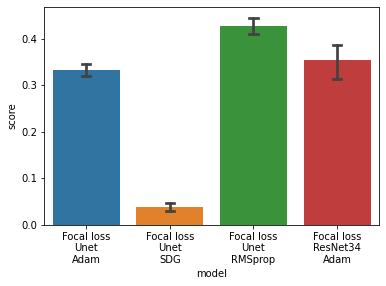

In [59]:
sns.barplot(data=k[k.epochs==250], x="model", y="score", capsize=0.1)

In [142]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [44]:
k[(k.epochs > 60) & (k.model == 'Resnet_m') | (k.model == 'Resnet_val_m')]

,model,score,epochs
60,Resnet_m,0.765464,61
61,Resnet_m,0.740525,62
62,Resnet_m,0.729882,63
63,Resnet_m,0.755064,64
64,Resnet_m,0.746379,65
...,...,...,...
8395,Resnet_m,0.919224,296
8396,Resnet_m,0.924343,297
8397,Resnet_m,0.923045,298
8398,Resnet_m,0.918532,299


In [60]:
k[k.score < 0] = 0.2

In [133]:
k

,model,score,epochs
0,ResNet34_val_mcc,0.000934,1
1,ResNet34_val_mcc,-0.008488,2
2,ResNet34_val_mcc,0.004311,3
3,ResNet34_val_mcc,0.004701,4
4,ResNet34_val_mcc,0.005354,5
...,...,...,...
11995,ResNet34_val_jaccard,0.792490,296
11996,ResNet34_val_jaccard,0.787261,297
11997,ResNet34_val_jaccard,0.781244,298
11998,ResNet34_val_jaccard,0.791993,299


Text(0, 0.5, 'Score/Loss')

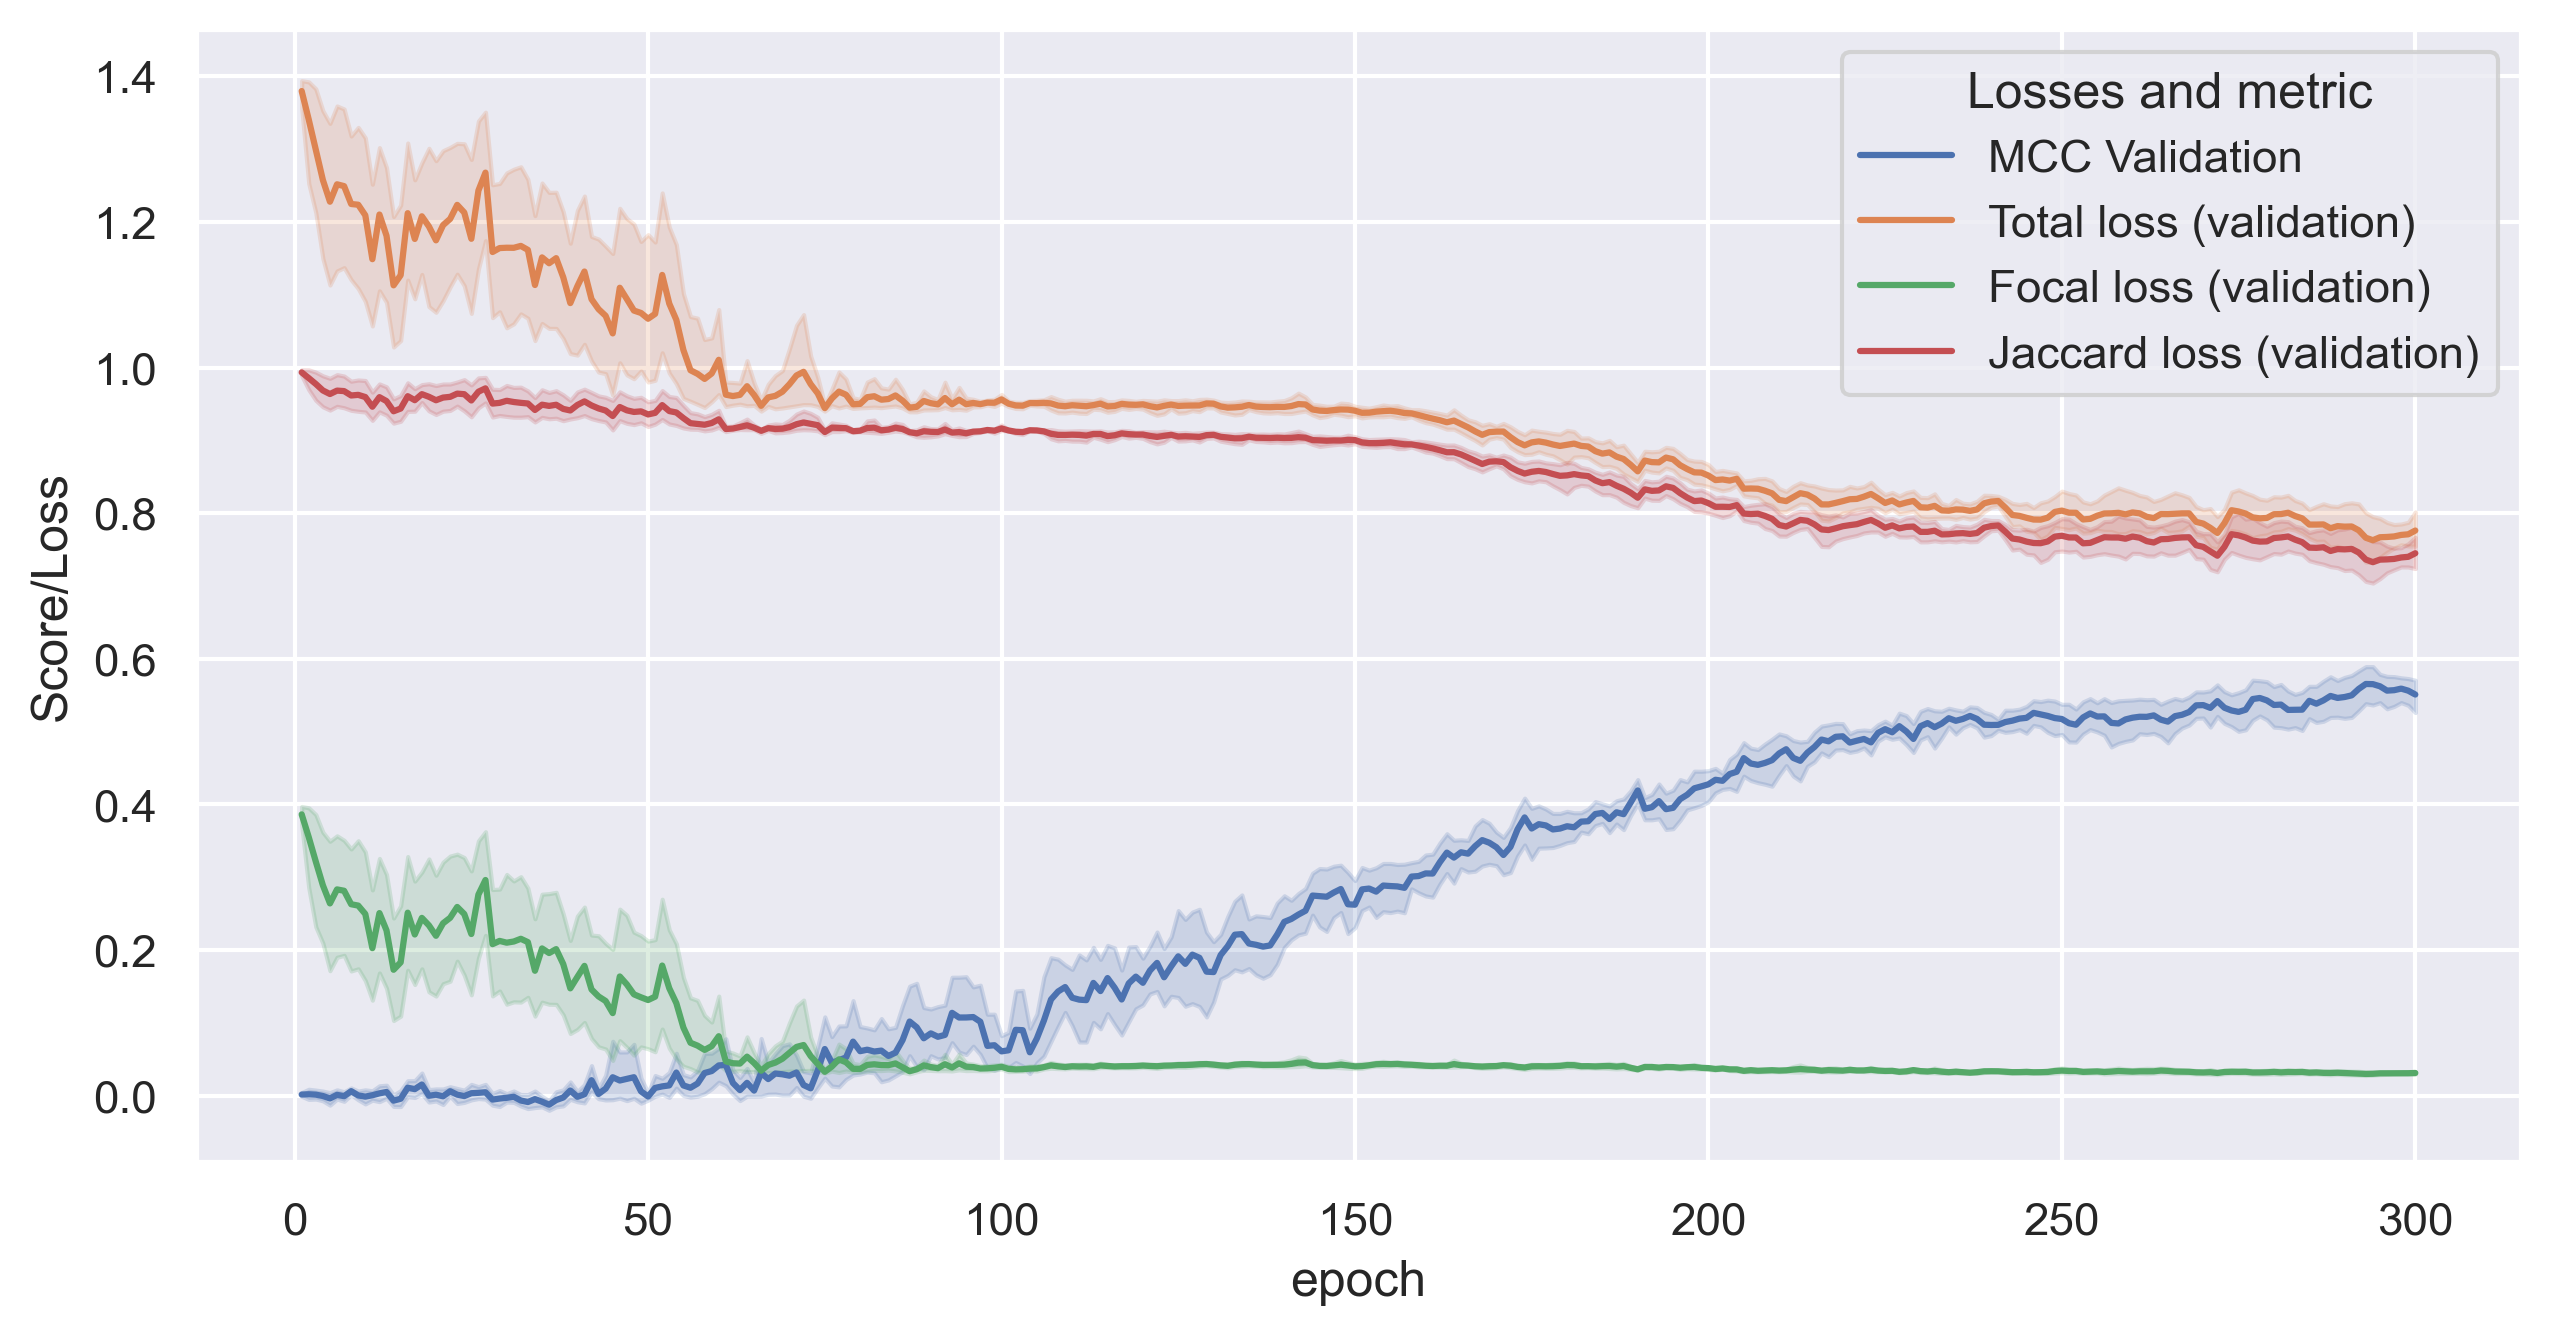

In [156]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=k[(k.epochs> 0)],
             x="epochs",y="score", hue="model", ax=ax)
plt.legend(["MCC Validation", "Total loss (validation)", "Focal loss (validation)", "Jaccard loss (validation)"], title="Losses and metric")
#plt.legend(["Focal loss (validation)"])
plt.xlabel("epoch")
plt.ylabel("Score/Loss")

Text(0.5, 0, 'epoch')

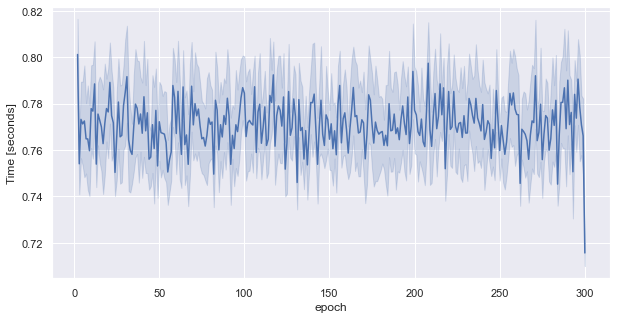

In [69]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=k[(k.epochs > 1) & (k.model == 'Resnet_times')], x="epochs",y="score", ci=95, ax=ax)
plt.ylabel("Time [seconds]"); plt.xlabel("epoch")

Text(0, 0.5, 'Time [seconds]')

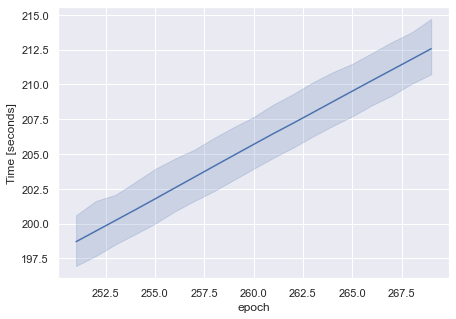

In [40]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=k[(k.epochs > 250) & (k.epochs < 270) & (k.model == 'Resnet_tot_times')], x="epochs",ci=95, y="score", ax=ax)
plt.xlabel("epoch"); plt.ylabel("Time [seconds]")

In [19]:
losses = {"Jaccard":0, "Dice":1, "Focal":2}
opti = {"SGD":0, "Adam":1}
nets = {"Resnet34":0, "Resnet50":1}

results = [("Jaccard", "SGD", "Resnet34", 0.45),
           ("Jaccard", "Adam", "Resnet34", 0.42),
           ("Jaccard", "SGD", "Resnet50", 0.41),
           ("Jaccard", "Adam", "Resnet50", 0.42),
           ("Dice", "SGD", "Resnet34", 0.45),
           ("Dice", "Adam", "Resnet34", 0.49),
           ("Dice", "Adam", "Resnet50", 0.51),
           ("Dice", "SGD", "Resnet50", 0.09),
           ("Dice", "SGD", "Resnet50", 0.10),
           ("Dice", "SGD", "Resnet50", 0.11),
           ("Dice", "SGD", "Resnet50", 0.12),
           ("Focal", "SGD", "Resnet34", 0.32),
           ("Focal", "SGD", "Resnet50", 0.43),
           ("Focal", "Adam", "Resnet34", 0.55),
           ("Focal", "Adam", "Resnet50", 0.39)]


results_matrix = []
for l,o,n,score in results:
    results_matrix.append([losses[l], opti[o], nets[n], score])
    
    

In [20]:
da_a = pd.DataFrame(results, columns=["Loss", "Opti", "Net", "score"])

In [21]:
da_a["navn"] = [str(v.Loss)+"\n"+str(v.Opti)+"\n"+str(v.Net) for i,v in da_a.iterrows()]

In [22]:
da_a

,Loss,Opti,Net,score,navn
0,Jaccard,SGD,Resnet34,0.45,Jaccard\nSGD\nResnet34
1,Jaccard,Adam,Resnet34,0.42,Jaccard\nAdam\nResnet34
2,Jaccard,SGD,Resnet50,0.41,Jaccard\nSGD\nResnet50
3,Jaccard,Adam,Resnet50,0.42,Jaccard\nAdam\nResnet50
4,Dice,SGD,Resnet34,0.45,Dice\nSGD\nResnet34
5,Dice,Adam,Resnet34,0.49,Dice\nAdam\nResnet34
6,Dice,Adam,Resnet50,0.51,Dice\nAdam\nResnet50
7,Dice,SGD,Resnet50,0.09,Dice\nSGD\nResnet50
8,Dice,SGD,Resnet50,0.10,Dice\nSGD\nResnet50
9,Dice,SGD,Resnet50,0.11,Dice\nSGD\nResnet50


<AxesSubplot:xlabel='navn', ylabel='score'>

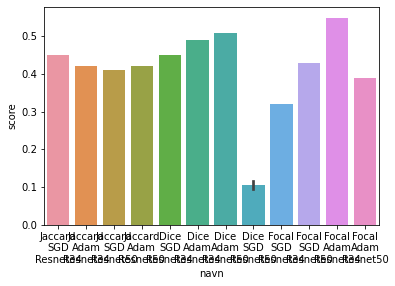

In [23]:
sns.barplot(data = da_a, x="navn" , y="score")

In [181]:
df = pd.DataFrame(results_matrix, columns=["loss", "opti", "net", "score"])

In [182]:
df

,loss,opti,net,score
0,0,0,0,0.45
1,0,1,0,0.42
2,0,0,1,0.41
3,0,1,1,0.42
4,1,0,0,0.45
5,1,1,0,0.49
6,1,1,1,0.51
7,1,0,1,0.09
8,2,0,0,0.32
9,2,0,1,0.43


In [214]:
#%matplotlib notebook

<IPython.core.display.Javascript object>


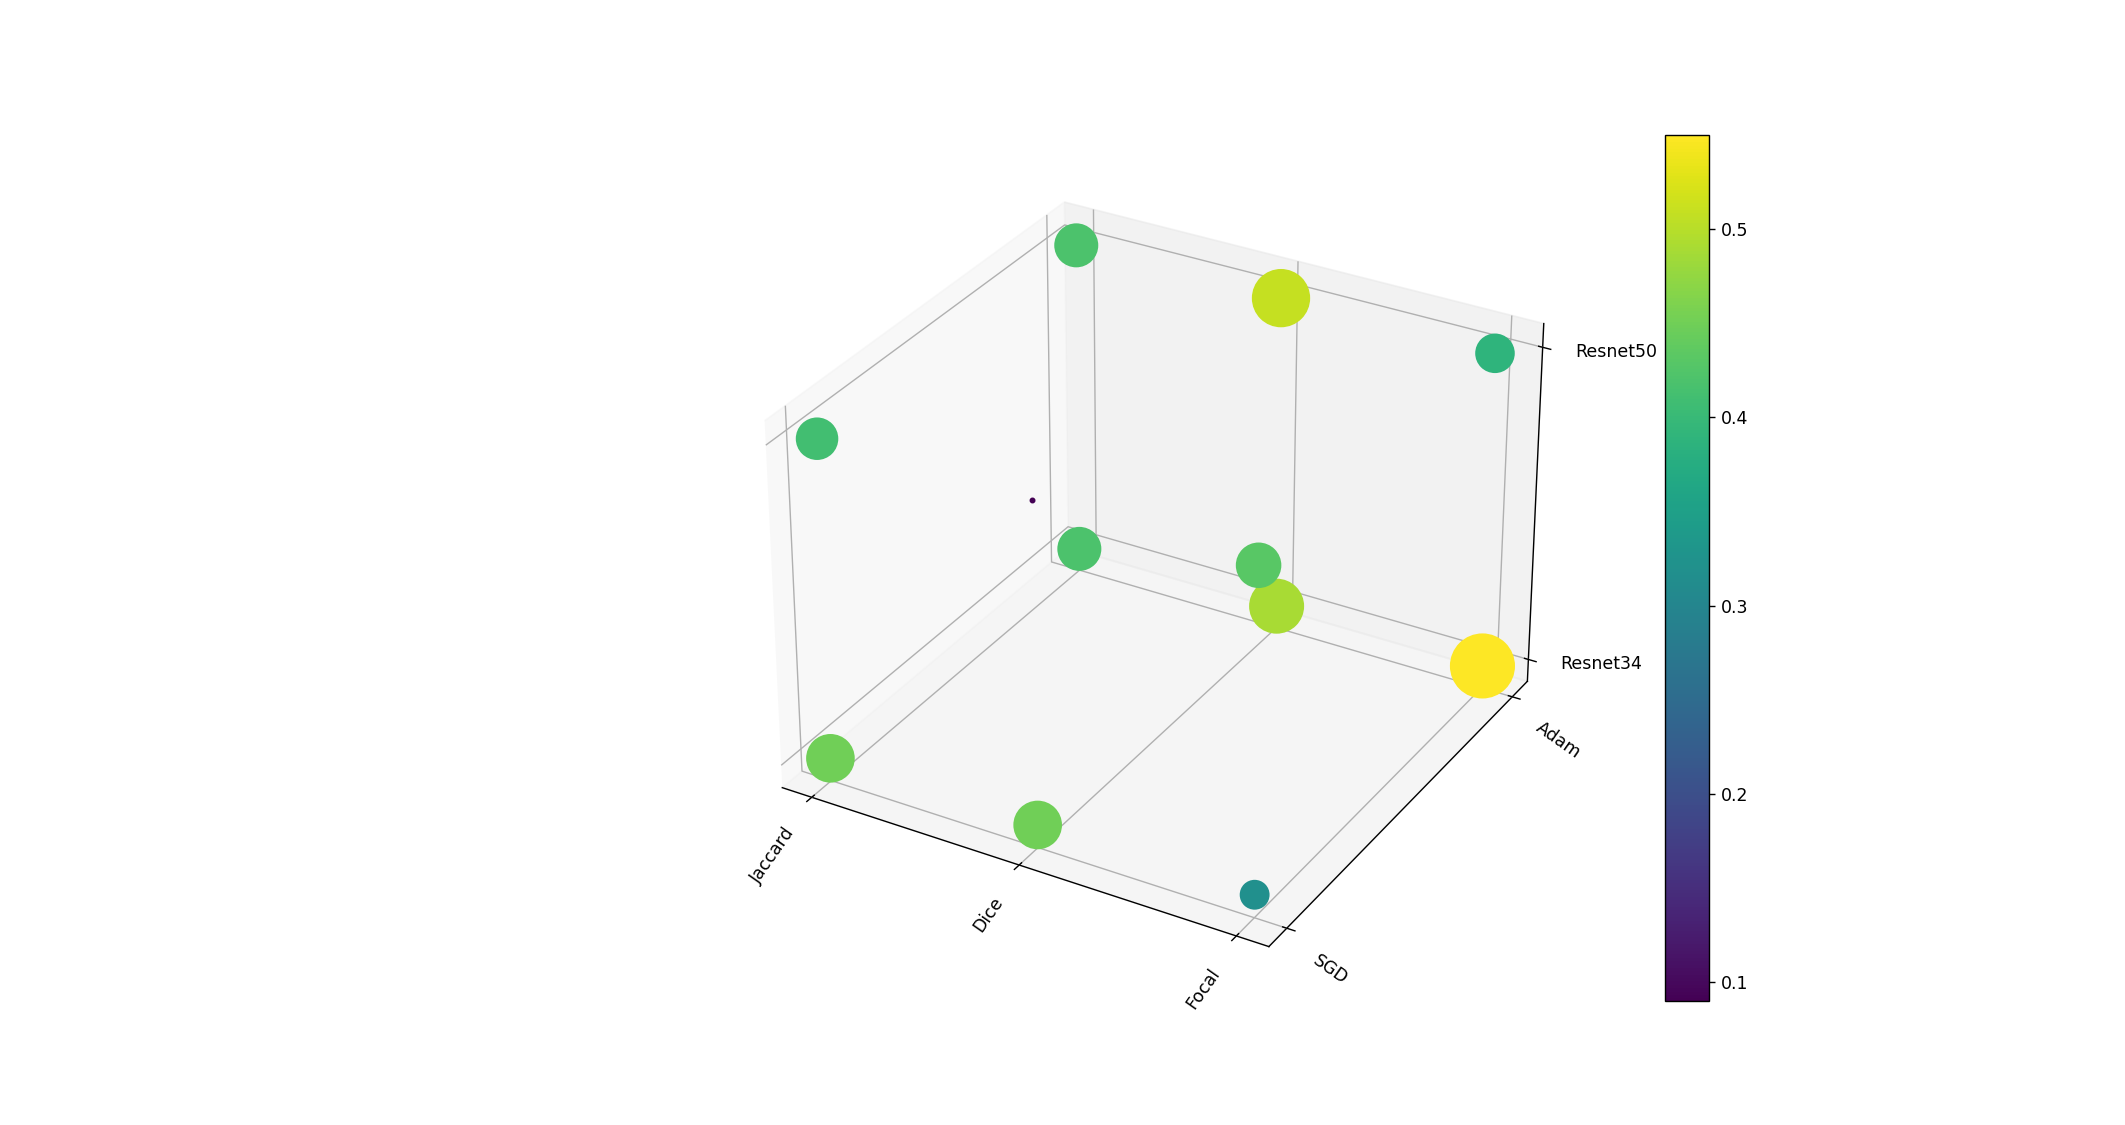

[Text(0, 0, 'Resnet34'), Text(1, 0, 'Resnet50')]

In [215]:
#sns.reset_orig()
#sns.set_style()

fig = plt.figure(figsize=(17,9))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(df.loss,
                df.opti,
                df.net,
               s=(20*df.score)**3,
               c=df.score, alpha=1)#, 
               # cmap="Greys")

plt.colorbar(sc)

ax.set_xticks([i for i in range(len(losses.keys()))])
ax.set_yticks([i for i in range(len(opti.keys()))])
ax.set_zticks([i for i in range(len(nets.keys()))])


ax.set_xticklabels(losses.keys(), rotation=55, ha="right")
ax.set_yticklabels(opti.keys(), rotation=-35, ha="left")
ax.set_zticklabels(nets.keys(), ha="left")




In [143]:
x

[0, 2, 4, 6, 8, 10]

In [144]:
s

[20, 40, 80, 160, 320, 640]